***
# **UNIVERSIDAD POLITECNICA SALESIANA**
# Explicación de Predicciones SVM
BY:
Juan Uzhca
***

## Importacion de librerias y configuracion inical

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models

# Configuración de semillas para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

print("Librerías importadas correctamente.")
print(f"Versión de TensorFlow: {tf.__version__}")

Librerías importadas correctamente.
Versión de TensorFlow: 2.20.0


***
Dataset: OXFORD-IIIT PET DATASET\
El dataset contiene imagenes de perros y gatos diferenciados por los nombres de los archivos (Mayusculas = gato y Minusculas = perro)
***

## Definición de Constantes y Carga de Datos

In [2]:
DATASET_PATH = "../data/The Oxford-IIIT Pet Dataset" 
IMG_SIZE = (64, 64)
CHANNELS = 1        # 1 para escala de grises, 3 para color

def load_dataset_cnn(path):
    image_files = [f for f in os.listdir(path) if f.endswith(".jpg")]
    X = []
    y = []
    
    print(f"Cargando {len(image_files)} imágenes...")
    
    for img_name in image_files:
        img_path = os.path.join(path, img_name)
        try:
            img = Image.open(img_path).convert("L")
            img = img.resize(IMG_SIZE)
            img_array = np.array(img) / 255.0
            
            X.append(img_array)
            
            # Gato = 0, Perro = 1
            if img_name[0].islower():
                y.append(1) # Perro
            else:
                y.append(0) # Gato
                
        except Exception as e:
            print(f"Error cargando imagen {img_name}: {e}")

    X = np.array(X)
    y = np.array(y)
    
    X = X.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], CHANNELS)
    
    return X, y

if os.path.exists(DATASET_PATH):
    X, y = load_dataset_cnn(DATASET_PATH)
    print(f"Dimensiones de X: {X.shape}")
    print(f"Dimensiones de y: {y.shape}")
else:
    print(f"ERROR: No se encuentra la ruta {DATASET_PATH}")

Cargando 7389 imágenes...
Dimensiones de X: (7389, 64, 64, 1)
Dimensiones de y: (7389,)


## Division Train/Test del dataset

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Entrenamiento: {X_train.shape[0]} imágenes")
print(f"Prueba: {X_test.shape[0]} imágenes")

Entrenamiento: 5911 imágenes
Prueba: 1478 imágenes


## Construcción del modelo CNN

In [4]:
def build_cnn_model():
    model = models.Sequential([
        # Capa 1: 32 filtros
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
        layers.MaxPooling2D((2, 2)),
        
        # Capa 2: 64 filtros
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Capa 3: 128 filtros
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # --- Clasificación ---
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5), 
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model = build_cnn_model()
cnn_model.summary()

C:\Users\Daviid\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 682,753 (2.60 MB)

 Trainable params: 682,753 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento del modelo

In [5]:
print("Iniciando entrenamiento...")
history = cnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)
print("Entrenamiento finalizado.")

Iniciando entrenamiento...
Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6726 - loss: 0.6120 - val_accuracy: 0.6847 - val_loss: 0.5669
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7019 - loss: 0.5620 - val_accuracy: 0.7212 - val_loss: 0.5665
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7559 - loss: 0.5082 - val_accuracy: 0.7300 - val_loss: 0.5213
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7787 - loss: 0.4643 - val_accuracy: 0.7524 - val_loss: 0.4876
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7980 - loss: 0.4313 - val_accuracy: 0.7483 - val_loss: 0.4929
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8198 - loss: 0.3874 - val_accuracy: 0.7828 - val_loss: 0.4544
Epoch 7/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8511 - loss: 0.3376 - val_accuracy: 0.7943 - val_loss: 0.4292
Epoch 8/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.877

## Evaluación de resultados

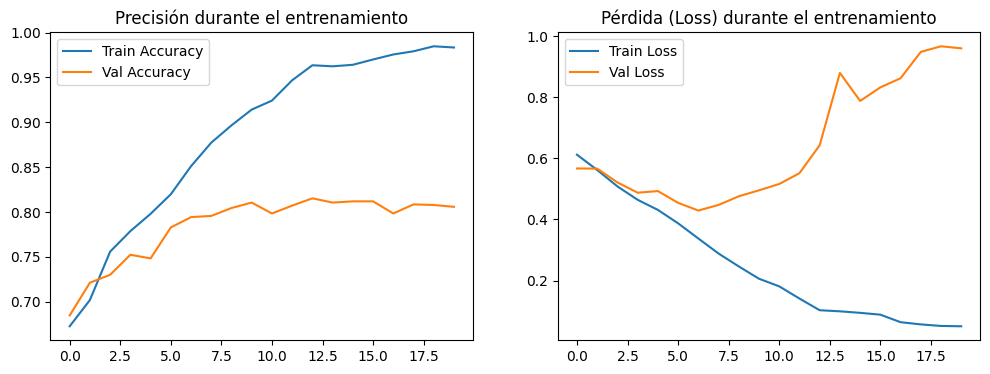


Accuracy Final en Test: 80.58%
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


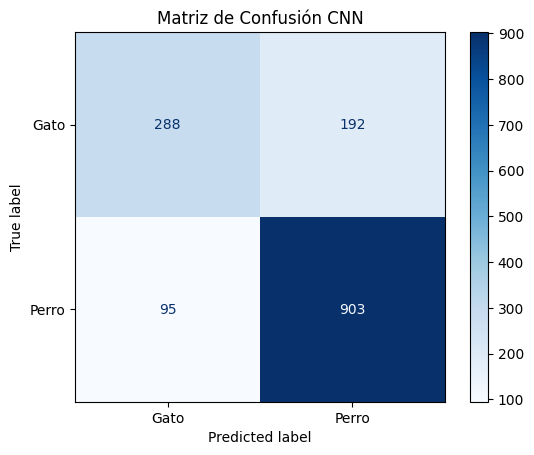

In [6]:
# 1. Gráfica de aprendizaje
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Pérdida (Loss) durante el entrenamiento')
plt.legend()
plt.show()

# 2. Evaluación numérica
loss, acc = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"\nAccuracy Final en Test: {acc*100:.2f}%")

# 3. Matriz de Confusión
y_pred_probs = cnn_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Gato', 'Perro'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión CNN")
plt.show()

## Mapas de Saliencia

In [7]:
def get_saliency_map(model, image):
    img_tensor = tf.convert_to_tensor(image.reshape(1, 64, 64, 1), dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        preds = model(img_tensor)
    
    grads = tape.gradient(preds, img_tensor)
    
    # CASO 1: Si el gradiente es None (modelo desconectado) o todo Ceros (saturación)
    if grads is None or tf.reduce_max(tf.abs(grads)) == 0:
        print("Aviso: Gradiente cero (La IA está demasiado segura o hay un error).")
        return np.zeros((64, 64))
    
    dgrad_abs = tf.math.abs(grads)
    saliency = np.max(dgrad_abs, axis=-1)[0]
    
    # CASO 2: Normalización segura (evitar división por cero)
    min_val = np.min(saliency)
    max_val = np.max(saliency)

    saliency = (saliency - min_val) / (max_val - min_val + 1e-8)
    
    return saliency

print("Función de X-AI cargada.")

Función de X-AI cargada.


## Visualización de Predicciones y Explicaciones

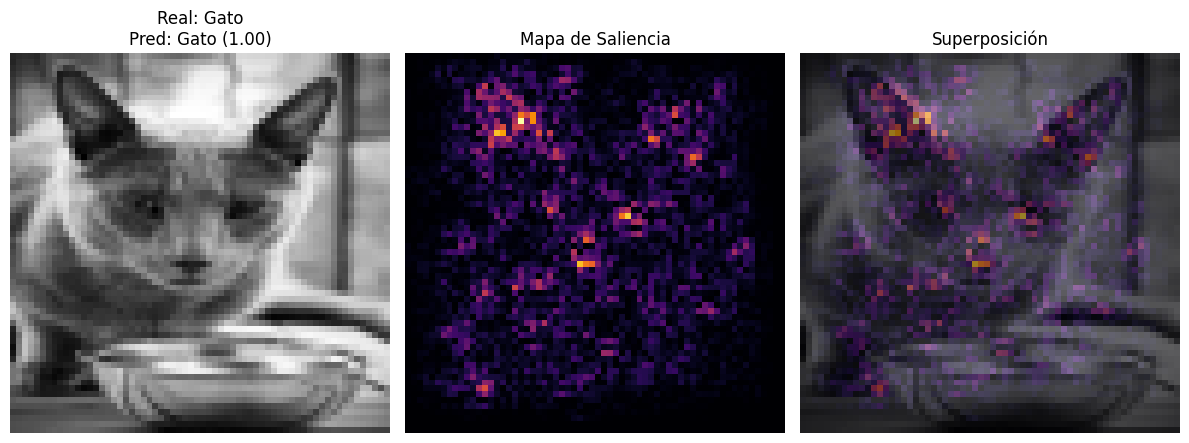

In [18]:
# Elegir una imagen aleatoria del set de prueba
idx = np.random.randint(0, len(X_test))
sample_img = X_test[idx]
true_label_str = "Perro" if y_test[idx] == 1 else "Gato"

# Predecir
pred_prob = cnn_model.predict(sample_img.reshape(1, 64, 64, 1), verbose=0)[0][0]
pred_label_str = "Perro" if pred_prob > 0.5 else "Gato"
confidence = pred_prob if pred_prob > 0.5 else 1 - pred_prob

# Obtener mapa de explicación
saliency_map = get_saliency_map(cnn_model, sample_img)

# VISUALIZACIÓN
plt.figure(figsize=(12, 5))

# 1. Imagen Original
plt.subplot(1, 3, 1)
plt.imshow(sample_img.reshape(64, 64), cmap='gray')
plt.title(f"Real: {true_label_str}\nPred: {pred_label_str} ({confidence:.2f})")
plt.axis('off')

# 2. Mapa de Saliencia (Calor)
plt.subplot(1, 3, 2)
plt.imshow(saliency_map, cmap='inferno')
plt.title("Mapa de Saliencia")
plt.axis('off')

# 3. Superposición
plt.subplot(1, 3, 3)
plt.imshow(sample_img.reshape(64, 64), cmap='gray')
plt.imshow(saliency_map, cmap='inferno', alpha=0.6) # Alpha controla transparencia
plt.title("Superposición")
plt.axis('off')

plt.tight_layout()
plt.show()

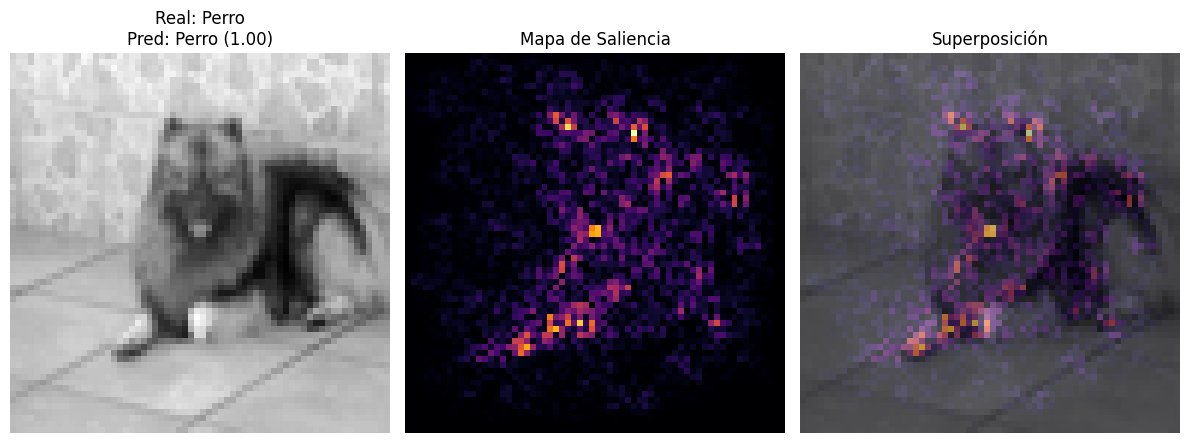

In [15]:
# Elegir una imagen aleatoria del set de prueba
idx = np.random.randint(0, len(X_test))
sample_img = X_test[idx]
true_label_str = "Perro" if y_test[idx] == 1 else "Gato"

# Predecir
pred_prob = cnn_model.predict(sample_img.reshape(1, 64, 64, 1), verbose=0)[0][0]
pred_label_str = "Perro" if pred_prob > 0.5 else "Gato"
confidence = pred_prob if pred_prob > 0.5 else 1 - pred_prob

# Obtener mapa de explicación
saliency_map = get_saliency_map(cnn_model, sample_img)

# VISUALIZACIÓN
plt.figure(figsize=(12, 5))

# 1. Imagen Original
plt.subplot(1, 3, 1)
plt.imshow(sample_img.reshape(64, 64), cmap='gray')
plt.title(f"Real: {true_label_str}\nPred: {pred_label_str} ({confidence:.2f})")
plt.axis('off')

# 2. Mapa de Saliencia (Calor)
plt.subplot(1, 3, 2)
plt.imshow(saliency_map, cmap='inferno')
plt.title("Mapa de Saliencia")
plt.axis('off')

# 3. Superposición
plt.subplot(1, 3, 3)
plt.imshow(sample_img.reshape(64, 64), cmap='gray')
plt.imshow(saliency_map, cmap='inferno', alpha=0.6) # Alpha controla transparencia
plt.title("Superposición")
plt.axis('off')

plt.tight_layout()
plt.show()

***
## Conclusiones

Las zonas brillantes (amarillo/naranja) son los pixeles que mas influyeron en la desicion de la Red Neuronal

Los mapas de saliencia basados en gradientes simples (Vanilla Backpropagation) presentan limitaciones cuando el modelo alcanza una confianza del 100% (saturación). En estos casos, la ausencia de gradientes impide visualizar las características determinantes, lo que sugiere que para modelos altamente precisos, podrían requerirse técnicas más avanzadas como Grad-CAM o Integrated Gradients (como se usó en la práctica de datos tabulares ) que son robustas ante la saturación.

***